# Chapter 7: Convolutional Neural Network
>  
> ### **7.1** 전체 구조  
> CNN도 지금까지 본 신경망과 같이 레고 블록처럼 계층을 조합하여 만들 수 있음  
>  
> convolutional layer와 pooling layer가 새롭게 등장  
>  
> 지금까지 본 신경망은 인접하는 계층의 모든 뉴런과 결합되어 있었음  
> &nbsp; &nbsp; &rarr; 이를 fully-connected라고 하며, 이러한 계층을 Affine layer라는 이름으로 구현했음  
>  
> Affine layer를 사용하면 층이 5개인 fully-connected neural network는 다음과 같이 구현할 수 있음  
>  
> ![pic/affine_layer_network](pic/affine_layer_network.png)  
>  
> 위와 같이 fully-connected neural network는 Affine layer뒤에 activation function을 갖는 ReLU layer(혹은 Sigmoid layer)가 이어짐  
>  
> 위 그림에서는 Affine-ReLU 조합이 4개 쌓였고, 마지막 5번째 layer는 Affine layer에 이어 softmax layer에서 최종 결과(확률)를 출력  
>  
> ![pic/cnn_example](pic/cnn_example.png)  
>  
> 위와 같이 CNN에서는 Conv layer와 Polling layer가 추가됨  
>  
> CNN의 layer는 'Conv-ReLU-(Pooling)'흐름으로 연결됨 (Pooling layer는 생략하기도 함)  
>  
> 지금까지의 'Affine-ReLU'연결이 'Conv-ReLU-(Pooling)'으로 바뀌었다고 생각할 수 있음  
>  
> 위 그림의 CNN에서 주목할 또 다른 점은 출력에 가까운 layer에서는 지금까지의 'Affine-ReLU'구성을 사용할 수 있다는 것  
>  
> 마지막 출력 layer에서는 'Affine-Softmax'조합을 그대로 사용함  
>  
> 이것이 일반적인 CNN에서 흔히 볼 수 있는 구성  

> ### **7.2** Convolutional layer
> CNN에서는 padding, stride 등 CNN 고유의 용어가 등장  
>  
> 각 layer 사이에는 3차원 데이터같이 입체적인 데이터가 흐른다는 점에서 fully-connected network와 다름  
>>  
>> ##### fully-connected layer의 문제점
>> 지금까지 본 fully-connected network에서는 fully-connected layer(Affine layer)를 사용했음  
>>  
>> fully-connected layer에서는 인접하는 layer의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있음  
>>  
>> fully-connected layer의 문제점은 무엇일까?  
>> &nbsp; &nbsp; &rarr; '데이터의 형상이 무시'됨  
>>  
>> 입력 데이터가 이미지인 경우를 예로 들면, 이미지는 통상 세로 &middot; 가로 &middot; 채널로 구성된 3차원 데이터  
>>  
>> fully-connected layer에 입력할 때에는 3차원 데이터를 평평한 1차원 데이터로 평탄화해야 함  
>>  
>> 지금까지의 MNIST 데이터셋을 사용한 사례에서는 shape이 (1, 28, 28)인 이미지(1채널, 세로 28픽셀, 가로 28픽셀)를 1줄로 세운 784개의 데이터를 첫 Affine layer에 입력  
>>  
>> 이미지는 3차원 shape이며, 이 shape에는 중요한 공간적 정보가 담겨 있음  
>> &nbsp; &nbsp; &rarr; 예를 들어 공간적으로 가까운 픽셀은 값이 비슷하거나, RGB의 각 채널은 서로 밀접하게 관련되어 있거나, 거리가 먼 픽셀끼리는 연관이 없는 등, 3차원 속에서 의미를 갖는 본질적인 패턴이 숨어 있을 것  
>>  
>> 그러나 fully-connected layer는 shape을 무시하고 모든 입력 데이터를 동등한 뉴런(같은 차원의 뉴런)으로 취급하여 shape에 담긴 정보를 살릴 수 없음  
>>  
>> Conv layer는 shape을 유지함  
>>  
>> 이미지도 3차원 데이터로 입력받으며, 다음 계층에도 3차원 데이터로 전달함  
>> &nbsp; &nbsp; &rarr; CNN에서는 이미지처럼 형상을 가진 데이터를 제대로 이해할 가능성이 있는 것  
>>  
>> CNN에서는 Conv layer의 입출력 데이터를 feature map이라고도 함  
>>  
>> Conv layer의 입력 데이터를 input feature map, 출력 데이터를 output feature map이라고 함  
>>  
>> 이 책에서는 '입출력 데이터'와 'feature map'을 같은 의미로 사용  

>> ##### 합성곱 연산
>> Conv layer에서는 합성곱 연산을 처리함  
>>  
>> 합성곱 연산은 이미지 처리에서 말하는 필터 연산에 해당  
>>  
>> ![pic/conv_cal_ex](pic/conv_cal_ex.png)  
>>  
>> 위 그림과 같이 합성곱 연산은 입력 데이터에 필터를 적용함  
>>  
>> 이 예에서 입력 데이터는 세로 &middot; 가로 방향의 형상을 가졌고, 필터 역시 세로 &middot; 가로 방향의 차원을 가짐  
>>  
>> 데이터와 필터의 shape을 (height, width)로 표기하며, 이 예에서 입력은 (4, 4), 필터는 (3, 3), 출력은 (2, 2)가 됨  
>>  
>> 문헌에 따라 필터를 커널이라 하기도 함  
>>  
>>  
>>  
>> 위 그림의 합성곱 연산  
>> * 합성곱 연산은 필터의 윈도우를 일정 간격으로 이동해가며 입력 데이터에 적용  
>>  
>> * 입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구함  
>> &nbsp; &nbsp; &rarr; 이 계산을 fused multiply-add, FMA라고 함  
>> * 연산 결과를 출력의 해당 장소에 저장  
>> * 이 과정을 모든 장소에서 수행하면 합성곱 연산의 출력이 완성됨  
>> 
>> ![pic/conv_cal_explain](pic/conv_cal_explain.png)  
>>  
>> fully-connected network에는 가중치 매개변수와 편향이 존재, CNN에서는 필터의 매개변수가 그동안의 '가중치'에 해당, 편향까지 포함하면 아래와 같이 표현할 수 있음  
>> 
>> ![pic/cnn_bias](pic/cnn_bias.png)  
>>  
>> 위 그림과 같이 편향은 필터를 적용한 후의 데이터에 더해짐  
>>  
>> 편향은 항상 하나($1 \times 1$)만 존재함  
>> 
>> 그 하나의 값을 필터를 적용한 모든 원소에 더함

>> ##### padding
>> padding: 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값(0 등)으로 채우는 일, 합성곱 연산에서 자주 이용하는 기법  
>>  
>> 아래 그림은 (4, 4) 크기의 입력 데이터에 폭이 1인 padding을 적용한 모습  
>>  
>> 폭 1짜리 padding은 입력 데이터 사방 1픽셀을 특정 값으로 채우는 것을 말함  
>> 
>> ![pic/padding_ex](pic/padding_ex.png)  
>>  
>> 위 그림과 같이 처음에 크기가 (4, 4)인 입력 데이터에 padding이 추가되어 (6, 6)이 됨  
>> 
>> 이 입력에 (3, 3) 크기의 필터를 걸면 (4, 4) 크기의 출력 데이터가 생성  
>>  
>> 이 예에서는 padding을 1로 설정했지만, 2나 3 등 원하는 정수로 설정할 수 있음  
>> 
>> 만약 그림 7-5에 패딩을 2로 설정하면 입력 데이터의 크기는 (8, 8)이 되고, 3으로 설정하면 (10, 10)이 됨  
>>  
>> padding은 주로 출력 크기를 조정할 목적으로 사용함  
>> 
>> 예를 들어 (4, 4) 입력 데이터에 (3, 3) 필터를 적용하면 출력은 (2, 2)가 되어 입력보다 2만큼 줄어듦  
>> &nbsp; &nbsp; &rarr; 이는 합성곱 연산을 몇 번이나 되풀이하는 심층 신경망에서는 문제가 될 수 있음  
>> &nbsp; &nbsp; &rarr; 합성곱 연산을 거칠 때마다 크기가 작아지면 어느 시점에서는 출력 크기가 1이 되어버림  
>> &nbsp; &nbsp; &rarr; 더 이상은 합성곱 연산을 적용할 수 없음  
>>  
>> 이러한 사태를 막기 위해 padding을 사용  
>> &nbsp; &nbsp; &rarr; 입력 데이터의 공간적 크기를 고정한 채로 다음 layer에 전달할 수 있음  

>> ##### stride
>> stride: 필터를 적용하는 위치의 간격  
>> 
>> 지금까지 본 예는 모두 stride가 1이었지만, 예를 들어 stride를 2로 하면 필터를 적용하는 윈도우가 두 칸씩 이동함  
>> 
>> ![pic/stride_2_ex](pic/stride_2_ex.png)  
>> 
>> 위 그림에서는 크기가 (7, 7)인 입력 데이터에 stride를 2로 설정한 필터를 적용함  
>> 
>> 이처럼 stride는 필터를 적용하는 간격을 지정함  
>> 
>> stride를 2로 하니 출력은 (3, 3)이 됨  
>> &nbsp; &nbsp; &rarr; 이처럼 stride를 키우면 출력 크기는 작아짐
>> 
>> 한편, padding을 크게 하면 출력 크기가 커짐  
>> 
>> 이러한 관계를 수식화하면 다음과 같음
>> 
>> * $ OH = \frac{H+2P-FH}{S} + 1 $
>> 
>> * $ OW = \frac{W+wP-FW}{S} + 1 $ &nbsp; &nbsp; &nbsp; [식 7.1]
>>      * H, W: 입력 크기 (height, width)
>>      * FH, FW: 필터 크기 (Filter Height, Filter Width)
>>      * OH, OW: 출력 크기 (Output Height, Output Width)
>>      * P: padding
>>      * S: stride
>>  
>> 연습
>> * 예1: 그림 7-6  
>> &nbsp; &nbsp; &nbsp; &nbsp; 입력: (4,4), padding: 1, stride: 1, 필터: (3,3)  
>> $$
>> OH = \frac{4+2 \cdot 1-3}{1} + 1 = 4
>> $$
>> $$
>> OW = \frac{4+2 \cdot 1-3}{1} + 1 = 4
>> $$
>>  
>> * 예2: 그림 7-7  
>> &nbsp; &nbsp; &nbsp; &nbsp; 입력: (7,7), padding: 0, stride: 2, 필터: (3,3)  
>> $$
>> OH = \frac{7+2 \cdot 0-3}{2} + 1 = 3
>> $$
>> $$
>> OW = \frac{7+2 \cdot 0-3}{2} + 1 = 3
>> $$
>> 
>> * 예3  
>> &nbsp; &nbsp; &nbsp; &nbsp; 입력: (28,31), padding: 2, stride: 3, 필터: (5,5)  
>> $$
>> OH = \frac{28+2 \cdot 2-5}{3} + 1 = 10
>> $$
>> $$
>> OW = \frac{31+2 \cdot 2-5}{3} + 1 = 11
>> $$
>>  
>> 위의 예에서처럼 식 7.1에 단순히 값을 대입하기만 하면 출력 크기를 구할 수 있음  
>> 
>> 단 식 7.1의 $ \frac{H+2P-FH}{S} $와 $ \frac{W+wP-FW}{S} $가 정수로 나누어 떨어지는 값이어야 한다는 점에 주의  
>> 
>> 출력 크기가 정수가 아니면 오류를 내는 등의 대응을 해주어야 함  
>> 
>> 딥러닝 프레임워크 중에는 값이 나누어 떨어지지 않을 때는 가장 가까운 정수로 반올림하는 등, 특별히 에러를 내지 않고 진행하도록 구현하는 경우도 있음  

>> ##### 3차원 데이터의 합성곱 연산
>> 지금까지 2차원 shape을 다루는 합성곱 연산을 살펴봄  
>> 
>> 그러나 이미지만 해도 height &middot; width에 더해 채널까지 고려한 3차원 데이터임  
>> 
>> 지금까지 살펴본 순서대로 채널까지 고려한 3차원 데이터를 다루는 합성곱 연산을 살펴볼 예정  
>> 
>> ![pic/3dim_conv_ex](pic/3dim_conv_ex.png)  
>> 
>> ![pic/order_3dim_conv](pic/order_3dim_conv.png)  
>> 
>> 위 그림은 3차원 데이터의 합성곱 연산 예  
>> 
>> 2차원일 때(그림 7-3)와 비교하면, 길이 방향(채널 방향)으로 feature map이 늘어남  
>> 
>> 채널 방향으로 feature map이 여러 개 있다면 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻음
>>  
>> 3차원 합성곱 연산에서 주의할 점은 입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다는 것  
>> 
>> 필터 자체의 크기는 원하는 값으로 설정할 수 있음 (단, 모든 채널의 필터가 같은 크기여야 함)  

>> ##### 블록으로 생각하기
>> 3차원 합성곱 연산은 데이터와 필터를 직육면체 블록이라고 생각하면 쉬움  
>> 
>> 블록은 3차원 직육면체임  
>> 
>> 3차원 데이터를 다차원 배열로 나타낼 때는 (channel, height, width)로 표현  
>> 
>> ![pic/conv_block](pic/conv_block.png)  
>> 
>> 위 그림에서 출력 데이터는 한 장의 feature map  
>> &nbsp; &nbsp; &rarr; 한 장의 feature map = 채널이 1개인 feature map  
>> 
>> 합성곱 연산의 출력으로 다수의 채널을 내보내려면 어떻게 해야 할까?  
>> &nbsp; &nbsp; &rarr; 필터(가중치)를 여러 개 사용  
>> 
>> 그림으로 나타내면 아래와 같음  
>>  
>> ![pic/conv_many_filter](pic/conv_many_filter.png)  
>> 
>> 위 그림과 같이 필터를 FN개 적용하면 출력 feature map도 FN개가 생성  
>> 
>> 그리고 그 FN개의 맵을 모으면 shape이 (FN, OH, OW)인 블록이 완성  
>>  
>> 이 완성된 블록을 다음 계층으로 넘기는 것이 CNN의 처리 흐름  
>>  
>> 살펴본 것처럼 합성곱 연산에서는 필터의 수도 고려해야 함  
>> 
>> 그렇기 때문에 필터의 가중치 데이터는 4차원 데이터이며 (output channel, input channel, height, width)로 나타냄  
>> &nbsp; &nbsp; &rarr; ex) 채널 수 $3$, 크기 $5 \times 5$인 필터가 $20$개 있다면 (20, 3, 5, 5)로 나타냄  
>> 
>> 합성곱 연산에도 편향이 쓰임  
>> 
>> 이를 그림으로 나타내면, 
>> 
>> ![pic/conv_cal_flow](pic/conv_cal_flow.png)  
>> 
>> 위 그림에서 보듯 편향은 채널 하나에 값 하나씩으로 구성됨  
>> 
>> 이 예에서는 편향의 shape은 (FN, 1, 1)이고, 필터의 출력 결과의 형사은 (FN, OH, OW)임  
>> 
>> 이 두 블록을 더하면 편향의 각 값이 필터의 출력인 (FN, OH, OW) 블록의 대응 채널의 원소 모두에 더해짐  

>> ##### 배치 처리
>> 신경망 처리에서는 입력 데이터를 한 덩어리로 묶어 배치로 처리했음  
>> 
>> fully-connected network를 구현하면서는 이 방식을 지원하여 처리 효율을 높이고, 미니배치 방식의 학습도 지원하도록 했음  
>> 
>> 합성곱 연산도 마찬가지로 배치 처리를 지원  
>> &nbsp; &nbsp; &rarr; 각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장함  
>> 
>> 구체적으로는 데이터를 (number of data, channel, height, width)로 저장  
>> 
>> 데이터가 N개일 때 배치 처리한다면 데이터 형태가 다음과 같이 구성  
>> 
>> ![pic/conv_cal_batch](pic/conv_cal_batch.png)  
>> 
>> 배치 처리 시의 데이터 흐름을 나타낸 위 그림을 보면 각 데이터의 선두에 배치용 차원을 추가함  
>> 
>> 이처럼 데이터는 4차원 shape을 가진 채 각 layer를 타고 흐름  
>> 
>> 여기서 주의할 점으로는 신경망에 4차원 데이터가 하나 흐르 때마다 데이터 N개에 대한 합성곱 연산이 이뤄진다는 것  
>> 
>> 즉, N회 분의 처리를 한 번에 수행하는 것

> ### **7.3** Pooling layer
>> 
>> pooling: hegiht &middot; width 방향의 공간을 줄이는 연산  
>> 
>> ![pic/max_pooling_flow](pic/max_pooling_flow.png)  
>> 
>> 위 그림과 같이 $2 \times 2$영역을 원소 하나로 집약하여 공간 크기를 줄임  
>>  
>> 위 그림은 $ 2 \times 2$ max pooling을 stride 2로 처리하는 순서
>> 
>> max pooling: 최댓값을 구하는 연산  
>> 
>> '$2 \times 2$'는 대상 영역의 크기를 뜻함  
>> 
>> 즉 $2 \times 2$ max pooling은 위 그림과 같이 $2 \times 2$ 크기의 영역에서 가장 큰 원소 하나를 꺼냄  
>> 
>> stride는 이 예에서는 2로 설정했으므로 $2 \times 2$ 윈도우가 원소 2칸 간격으로 이동  
>> 
>> 참고로, pooling의 윈도우 크기와 stride는 같은 값으로 설정하는 것이 보통  
>> &nbsp; &nbsp; &rarr; ex) 윈도우가 $3 \times 3$ 이면 stride는 3으로, 윈도우가 $4 \times 4$이면 stride를 4 설정  
>>  
>> pooling은 max pooling 외에도 average pooling 등이 있음  
>> 
>> max pooling은 대상 영역에서 최댓값을 취하는 연산인 반면, average pooling은 대상 영역의 평균을 계산함  
>> 
>> 이미지 인식 분야에서는 주로 max pooling을 사용함  
>> &nbsp; &nbsp; &rarr; 이 책에서 pooling layer라고 하면 max pooling을 말하는 것  
>> 
>> ##### pooling layer의 특징
>> * 학습해야 할 매개변수가 없음  
>> &nbsp; &nbsp; pooling layer는 Conv layer와 달리 학습해야 할 매개변수가 없음  
>> &nbsp; &nbsp; pooling은 대상 영역에서 최댓값이나 평균을 취하는 명확한 처리이므로 특별히 학습할 것이 없음  
>> 
>> * 채널 수가 변하지 않음  
>> &nbsp; &nbsp; pooling 연산은 입력 데이터의 채널 수 그대로 출력 데이터로 내보냄  
>> &nbsp; &nbsp; pooling 연산은 아래 그림처럼 채널마다 독립적으로 계산하기 때문  
>>
>> ![pic/pooling_feature](pic/pooling_feature.png)  
>> 
>> * 입력의 변화에 영향을 적게 받음 (강건함)  
>> &nbsp; &nbsp; 입력 데이터가 조금 변해도 pooling의 결과는 잘 변하지 않음  
>> &nbsp; &nbsp; 예를 들어 다음 그림은 입력 데이터의 차이(데이터가 오른쪽으로 1칸씩 이동)를 pooling이 흡수해 사라지게 하는 모습을 보여줌  
>> 
>> ![pic/pooling_feature_2](pic/pooling_feature_2.png)  


> ### **7.4** Conv/Pooling layer 구현하기  
>>  
>> ##### 4차원 배열  
>> CNN에서 layer 사이를 흐르는 데이터는 4차원 데이터임  
>>  
>> 예를 들어 데이터의 shape이 (10, 1, 28, 28)이라면, 이는 height 28, width 28, 채널이 1개인 데이터가 10개인 데이터  
>> 
>> 이를 파이썬으로 구현하면 다음과 같음  


In [2]:
import numpy as np

x = np.random.rand(10, 1, 28, 28)   # 무작위로 데이터 생성

print(x.shape)

(10, 1, 28, 28)


>> 위 구현에서 첫 번째 데이터에 접근하려면 단순히 `x[0]`로 접근, 마찬가지로 두 번째 데이터는 `x[1]`위치에 있음

In [3]:
print(x[0].shape)
print(x[1].shape)

(1, 28, 28)
(1, 28, 28)


>> 첫 번째 데이터의 첫 채널의 공간 데이터에 접근하려면 다음과 같음

In [4]:
x[0, 0]

array([[9.63654930e-01, 2.70133878e-01, 5.90513631e-01, 1.33889394e-01,
        6.64864921e-01, 3.10319697e-02, 8.08453449e-01, 1.64234921e-01,
        9.55767513e-01, 9.88709104e-01, 1.47094740e-01, 1.68825915e-01,
        3.78001754e-01, 6.90078879e-01, 7.65159579e-01, 1.33405168e-01,
        9.59389183e-01, 1.07629077e-01, 5.26163258e-01, 1.20124731e-01,
        5.25486419e-01, 1.98785515e-01, 2.51981004e-01, 1.63028671e-01,
        7.82706250e-01, 2.24891233e-01, 1.17122457e-01, 7.12211826e-01],
       [4.03633082e-01, 8.31191712e-01, 9.75136653e-01, 6.11191461e-01,
        7.77244066e-01, 2.46218227e-01, 8.91685996e-01, 9.56385741e-01,
        1.95838934e-01, 6.25321943e-01, 2.36697700e-01, 2.27950900e-01,
        7.86215455e-01, 2.84020518e-01, 7.82213755e-01, 4.26332978e-01,
        4.97740524e-01, 3.39565178e-01, 8.46438964e-01, 8.55048275e-01,
        1.03897374e-03, 7.95177931e-01, 8.12788332e-01, 5.69023300e-01,
        5.37043180e-01, 3.69549232e-01, 7.02434371e-01, 5.13798

>> ##### im2col로 데이터 전개하기
>> 합성곱 연산을 곧이곧대로 구현하려면 for 문을 겹겹이 써야함  
>> &nbsp; &nbsp; &rarr; 너무 귀찮고, numpy에 for문을 사용하면 성능이 떨어짐  
>> &nbsp; &nbsp; &rarr; numpy에서는 원소에 접근할 때 for문을 사용하지 않는 것이 바람직함  
>> 
>> for문 대신 im2col이라는 편의 함수를 사용해 간단하게 구현  
>> 
>> im2col은 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는(펼치는) 함수  
>> 
>> 3차원 입력 데이터에 im2col을 적용하면 2차원 행렬로 바뀜  
>> &nbsp; &nbsp; &rarr; 정확히는 배치 안의 데이터 수까지 포함한 4차원 데이터를 2차원으로 변환  
>> 
>> ![pic/im2col_do](pic/im2col_do.png)  
>> 
>> im2col은 필터링하기 좋게 입력 데이터를 전개함  
>> &nbsp; &nbsp; &rarr; 입력 데이터에서 필터를 적용하는 영역(3차원 블록)을 한 줄로 늘어놓음  
>> 
>> 이러한 전개를 필터를 적용하는 모든 영역에서 수행하는 것이 im2col 함수임  
>> 
>> im2col은 'image to column', 즉 '이미지에서 행렬로'라는 뜻  
>> 
>> ![pic/im2col](pic/im2col_do_2.png)  
>> 
>> 위 그림에서는 보기 좋게끔 stride를 크게 잡아 필터의 적용 영역이 겹치지 않도록 했지만, 실제 상황에서는 영역이 겹치는 경우가 대부분  
>> 
>> 필터 적용 영역이 겹치게 되면 im2col로 전개한 후의 원소 수가 원래 블록의 원소 수보다 많아짐  
>> &nbsp; &nbsp; &rarr; im2col을 사용해 구현하면 메모리를 더 많이 소비한다는 단점이 있음  
>> 
>> 하지만 컴퓨터는 큰 행렬을 묶어서 계산하는 데 탁월함  
>> &nbsp; &nbsp; &rarr; 예를 들어 행렬 계산 라이브러리(선형 대수 라이브러리) 등은 행렬 계산에 고도로 최적화되어 큰 행렬의 곱셈을 빠르게 계산할 수 있음  
>> &nbsp; &nbsp; &rarr; 문제를 행렬 계산으로 만들면 선형 대수 라이브러리를 활용해 효율을 높일 수 있음  
>>  
>> im2col로 입력 데이터를 전개한 후에는 Conv layer의 필터(가중치)를 1열로 전개하고, 두 행렬의 곱을 계산  
>> &nbsp; &nbsp; &rarr; 이는 fully-connected layer의 Affine layer에서 한 것과 거의 같음  
>> 
>> ![pic/after_im2col](pic/after_im2col.png)  
>> 
>> 그림 7-19와 같이 im2col 방식으로 출력한 결과는 2차원 행렬  
>> 
>> CNN은 데이터를 4차원 배열로 저장하므로 2차원 출력 데이터를 4차원으로 변형(reshape)함
>>  
>> 이상이 Conv layer의 구현 흐름  


>> ##### Conv layer 구현하기
>> 이 책에서는 im2col 함수를 미리 만들어 제공 (common/util.py)  
>> 
>> im2col의 구현은 간단한 함수 10개 정도를 묶은 것  
>>  
>> im2col의 인터페이스는 다음과 같음  
>> ```
>> im2col(input_data, filter_h, filter_w, stride=1, pad=0)
>> ```  
>> * `input_data` - (number of data, channel, height, width)의 4차원 배열로 이뤄진 입력 데이터  
>> 
>> * `filter_h` - 필터의 높이
>> * `filter_w` - 필터의 너비
>> * `stride` - stride
>> * `pad` - padding  
>>  
>> im2col은 '필터 크기', 'stride', 'padding'을 고려하여 입력 데이터를 2차원 배열로 전개  

In [ ]:
# im2col 사용
import sys, os
sys.path.append(os.pardir)
from DLS_git_clone.common.util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)


>> 위 구현에서는 두 가지 예를 보여주고 있음  
>> * 배치 크기:1 (데이터 1개), 채널:3, height &middot; width:$7 \times 7$  
>> * 배치 크기:10 (데이터 10개), 채널:3, height &middot; width:$7 \times 7$  
>>  
>> im2col을 적용한 두 경우 모두 2번째 차원의 원소는 75개, 이 값은 필터의 원소 수와 같음 (채널 3개, $5 \times 5$데이터)  
>> 
>> 배치 크기가 1일 때는 im2col의 결과의 크기가 (9, 75)이고 10일 때는 그 10배인 (90, 75)크기의 데이터가 저장됨  
>> 
>> 이제 이 im2col을 사용하여 Conv layer 구현, Conv layer를 Convolution이라는 클래스로 구현  

In [6]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1+(H+2*self.pad-FH)/self.stride)
        out_w = int(1+(W+2*self.pad-FW)/self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b

        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out

>> Conv layer는 필터(가중치), 편향, stride, padding을 인수로 받아 초기화  
>> 
>> 필터는 (FN, C, FH, FW)의 4차원 형상  
>> * FN: 필터 개수  
>> 
>> * C: 채널  
>> * FH: 필터 높이  
>> * FW: 필터 너비  
>> 
>> 위 구현에서 입력 데이터를 im2col로 전개하고 필터도 reshape을 사용해 2차원 배열로 전개함  
>> 
>> 그리고 이렇게 전개한 두 행렬의 곱을 구함  
>> 
>> 필터를 전개하는 부분은 그림 7-19에서 보듯 각 필터 블록을 1줄로 펼쳐 세움  
>> 
>> 이때 reshape의 두 번째 인수를 -1로 지정  
>> &nbsp; &nbsp; &rarr; 이는 reshape이 제공하는 편의 기능으로, reshape에 -1을 지정하면 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 적절히 묶어줌  
>> &nbsp; &nbsp; &rarr; 위의 코드에서 (10, 3, 5, 5) 형상을 한 다차원 배열 W의 원소 수는 총 750개, 이 배열에 reshape(10, -1)을 호출하면 750개의 원소를 10묶음으로, 즉 shape이 (10, 75)인 배열로 만들어줌  
>> 
>> 다음으로 forward 구현의 마지막에서는 출력 데이터를 적절한 형상으로 바꿔줌  
>> 
>> 이때 numpy의 transpose 함수를 사용  
>> &nbsp; &nbsp; &rarr; 다차원 배열의 축 순서를 바꿔주는 함수  
>> 
>> 그림 7-20과 같이 인덱스(0부터 시작)를 지정하여 축의 순서를 변경  
>>  
>> ![pic/transpose](pic/transpose.png)  
>> 
>> 이상이 Conv Layer의 forward 구현  
>> 
>> im2col로 전개한 덕분에 fully-connected layer의 Affine layer와 거의 똑같이 구현할 수 있었음  
>> 
>> 다음은 Conv layer의 역전파를 구현할 차례이지만, Affine layer의 구현과 공통점이 많아 따로 설명하지 않음  
>> 
>> 주의할 것이 하나 있는데, Conv layer의 역전파에서는 im2col을 역으로 처리해야 함  
>> &nbsp; &nbsp; &rarr; 이는 이 책이 제공하는 col2im 함수를 사용 (common/util.py)  
>> 
>> col2im을 사용한다는 점을 제외하면 Conv layer의 역전파는 Affine layer와 같음  
>> 
>> Conv layer의 역전파 구현은 common/layer.py에 있음  

>> ##### Pooling layer 구현하기
>> pooling layer 구현도 Conv layer와 마찬가지로 m2col을 사용해 입력 데이터를 전개함  
>> 
>> 단, pooling의 경우 채널 쪽이 독립적이라는 점이 Conv layer 때와 다름  
>> &nbsp; &nbsp; &rarr; 구체적으로는 그림 7-21과 같이 pooling 적용 영역을 채널마다 독립적으로 전개함  
>> 
>> ![pic/pooling](pic/pooling.png)  
>> 
>> 일단 이렇게 전개한 후, 전개한 행렬에서 행별 최댓값을 구하고 적절한 shape으로 성형하기만 하면 됨  
>> 
>> ![pic/pooling_layer_flow](pic/pooling_layer_flow.png)  
>> 
>> 이상이 pooling layer의 forward 처리 흐름, 이를 파이썬으로 구현하면 다음과 같음  

In [8]:
# pooling layer 구현
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
    
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1+(H-self.poo_h)/self.stride)
        out_w = int(1+(W-self.pool_w)/self.stride)

        # 전개
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        # 최댓값
        out = np.max(col, axis=1)

        # 성형
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        return out

>> Pooling layer의 구현은 다음의 세 단계로 진행  
>> &nbsp; &nbsp; &rarr; 1. 입력 데이터를 전개함  
>> &nbsp; &nbsp; &rarr; 2. 행별 최댓값을 구함  
>> &nbsp; &nbsp; &rarr; 3. 적절한 모양으로 성형  
>> 
>> 최댓값 계산에는 numpy의 `np.max` 메서드를 사용할 수 있음  
>> 
>> `np.max`는 인수로 축(axis)을 지정할 수 있는데, 이 인수로 지정한 축마다 최댓값을 구할 수 있음  
>> &nbsp; &nbsp; &rarr; `np.max(x, axis=1)`과 같이 쓰면, 입력 x의 1번째 차원의 축마다 최댓값을 구함  
>> 
>> 이상이 Pooling layer의 forward 처리  
>> 
>> 지금까지 설명한 전략을 따라 입력 데이터를 pooling하기 쉬운 형태로 전개하면 그 후의 구현은 간단함  
>> 
>> Pooling layer의 backward 처리는 관련 사항을 이미 설명했으니 설명을 생략  
>> 
>> ReLU layer를 구현할 때 사용한 max의 역전파 참고 (5.5.1 ReLU layer)  
>> 
>> Pooling layer의 전체 구현은 common/layer.py에 있음  

> ### **7.5** CNN 구현하기
> Conv layer와 Pooling layer를 구현했으니, 이 layer들을 조합하여 손글씨 숫자를 인식하는 CNN을 조립할 예정 
>  
> 그림 7-23과 같은 CNN을 구현  
> 
> ![pic/simple_cnn](pic/simple_cnn.png)  
> 
> 위 그림의 CNN network는 'Convolution-ReLU-Pooing-Affine-ReLU-Affine-Softmax' 순으로 흐름  
> 
> 이를 SimpleConvNet이라는 이름의 클래스로 구현  
> 
> SimpleConvNet의 초기화(`__init__`), 초기화 때 받는 인수  
> * `input_dim` - 입력 데이터(channel, height, width)의 차원  
> 
> * `conv_param` - Conv layer의 hyper parameter(딕셔너리)  
> &nbsp; &nbsp; &nbsp; &nbsp; 딕셔너리의 키  
>       * `filter_num`- 필터 수  
>       * `filter_siz`- 필터 크기  
>       * `stride`- stride  
>       * `pad` - padding  
> * `hidden_size`- 은닉층(fully-connected)의 뉴런 수
> * `output_size`- 출력층(fully-connected)의 뉴런 수
> * `weight_init_std` - 초기화 때의 가중치 표준편차  
> 
> 여기에서 Conv layer의 hyper parameter는 딕셔너리 형태로 주어짐(`conv_param`)  
> 
> 이것은 필요한 hyper parameter값이 예컨대 `{'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1}`처럼 저장된다는 뜻  
> 
> SimpleConvNet의 초기화는 코드가 길어지므로 세 부분으로 나누어 설명  

In [16]:
import sys, os
sys.path.append(os.pardir)
from collections import OrderedDict
from DLS_git_clone.common.layers import Relu, SoftmaxWithLoss, Affine, Pooling

class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1}, hidden_size=100, output_size=10, weight_init_std=0.01):
        # 여기에서는 초기화 인수로 주어진 Conv layer의 hyper parameter를 딕셔너리에서 꺼냄(나중에 쓰기 쉽도록)  
        # 그리고 Conv layer의 출력 크기를 계산
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size-filter_size+2*filter_pad)/filter_stride+1
        pool_output_size = int(filter_num*(conv_output_size/2)*(conv_output_size/2))

        # 가중치 매개변수를 초기화하는 부분
        # 학습에 필요한 매개변수는 1번째 층의 Conv layer와 나머지 두 fully-connected layer의 가중치와 편향
        # 이 매개변수들을 인스턴스 변수 params 딕셔너리에 저장
        # 1번째 층의 합성곱 계층의 가중치를 W1, 편향을 b1이라는 키로 저장
        # 마찬가지로 2번째 층의 fully-connected layer의 가중치와 편향을 W2와 b2, 마지막 3번째 층의 fully-connected layer의 가중치와 편향을 W3, b3라는 키로 저장함
        self.params = {}
        self.params['W1'] = weight_init_std* np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std* np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std* np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 마지막으로 CNN을 구성하는 계층들을 생성
        # 순서가 있는 딕셔너리(OrderedDict)인 layers에 계층들을 차례로 추가
        # 마지막 SoftmaxWithLoss 계층만큼은 last_layer라는 별도 변수에 저장해둠
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        self.last_layer = SoftmaxWithLoss()

        # 이상이 SimpleConvNet의 초기화
        # 초기화를 마친 후에는 추론을 수행하는 prediect 메서드와 손실 함수의 값을 구하는 loss 메서드를 다음과 같이 구현
        # 이 코드에서 인수 x는 입력 데이터, t는 정답 레이블
        # 추론을 수행하는 predict 메서드는 초기화 때 layers에 추가한 계층을 맨 앞에서부터 차례로 forward 메서드를 호출하며 그 결과를 다음 계층에 전달
        # 손실 함수를 구하는 loss 메서드는 predict 메서드의 결과를 인수로 마지막 층의 forward 메서드를 호출
        # 즉, 첫 계층부터 마지막 계층까지 forward를 처리함
        def predict(self, x):
            for layer in self.layers.values():
                x = layer.forward(x)
            return x
        
        def loss(self, x, t):
            y = self.predict(x)
            return self.last_layer.forward(y, t)

        # 이어서 오차역전파법으로 기울기 구하는 구현
        # 매개변수의 기울기는 오차역전파법으로 구함
        # 이 과정은 순전파와 역전파를 반복
        # 지금까지 각 계층의 순전파와 역전파 기능을 제대로 구현했다면, 여기에서는 단지 그것들을 적절한 순서로 호출만 해주면 됨
        # 마지막으로 grads라는 딕셔너리 변수에 각 가중치 매개변수의 기울기를 저장
        # 이상이 SimpleConvNet의 구현
        def gradient(self, x, t):
            # 순전파
            self.loss(x, t)

            # 역전파
            dout = 1
            dout = self.last_layer.backward(dout)

            layers = list(self.layers.values())
            layers.reverse()
            for layer in layers:
                dout = layer.backward(dout)
            
            # 결과 저장
            grads = {}
            grads['W1'] = self.layers['Conv1'].dw
            grads['b1'] = self.layers['Conv1'].db
            grads['W2'] = self.layers['Affine1'].dw
            grads['b2'] = self.layers['Affine1'].db
            grads['W3'] = self.layers['Affine2'].dw
            grads['b3'] = self.layers['Affine2'].db

            return grads




> 이제 이 SimpleConvNet으로 MNIST 데이터셋을 학습할 차례  
> 
> 학습을 위한 코드는 4.5 학습 알고리즘 구현히기에서 설명한 것과 거의 같으니 코드는 생략 (소스코드는 ch07/train_convnet.py에 있음)  

train loss:2.299158550656108
=== epoch:1, train acc:0.121, test acc:0.15 ===
train loss:2.296337646990855
train loss:2.291616994033077
train loss:2.2839854892011315
train loss:2.272756873833349
train loss:2.2629060584288214
train loss:2.2529295182560385
train loss:2.2178468329097187
train loss:2.2116757439546024
train loss:2.1914768829757314
train loss:2.1469071128455077
train loss:2.0988140278815726
train loss:2.0853688186240205
train loss:1.9679299489658235
train loss:1.9565112715902502
train loss:1.8832801568257702
train loss:1.8813644157128508
train loss:1.8319139000786375
train loss:1.73387926750832
train loss:1.67373724596842
train loss:1.570842908955031
train loss:1.444893828227135
train loss:1.4770289385130146
train loss:1.2552690842926604
train loss:1.4561401185861629
train loss:1.049497047194964
train loss:1.1090595316517933
train loss:1.0269994681126458
train loss:0.9790485904717139
train loss:0.8955882159664905
train loss:0.8761884360862368
train loss:0.7488071076022094
tra

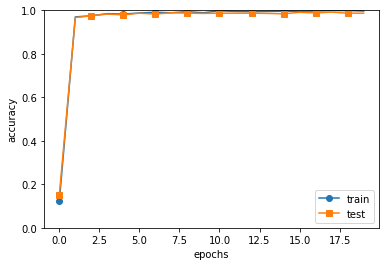

In [19]:
# CNN, MNIST 학습
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from DLS_git_clone.dataset.mnist import load_mnist
from DLS_git_clone.ch07.simple_convnet import SimpleConvNet
from DLS_git_clone.common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1}, hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test, epochs=max_epochs, mini_batch_size=100, optimizer='Adam', optimizer_param={'lr':0.001}, evaluate_sample_num_per_epoch=1000)

trainer.train()

network.save_params('params.pkl')
print('Saved Network Parameters!')

markers = {'train':'o', 'test':'s'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

> ### **7.6** CNN 시각화하기
> 
> CNN을 구성하는 Conv layer는 입력으로 받은 이미지 데이터에서 무엇을 보는 것일까?  
> 
> 이를 알아보기 위해 Conv layer를 시각화  
>>  
>> ##### 1번째 층의 가중치 시각화
>>  
>> MNIST로 간단한 CNN 학습을 해보았는데, 1번째 층의 Conv layer의 가중치는 shape이 (30, 1, 5, 5)였음 (필터 30개, 채널 1개, $5 \times 5$크기)  
>> 
>> 필터의 크기가 $5 \times 5$이고 채널이 1개라는 것은 이 필터를 1채널의 회색조 이미지로 시각화할 수 있다는 뜻  
>> 
>> 1층의 Conv layer 필터를 이미지로 나타낼 예정, 여기에서는 학습 전과 후의 가중치를 비교해볼 텐데, 그 결과는 그림 7-24처럼 됨

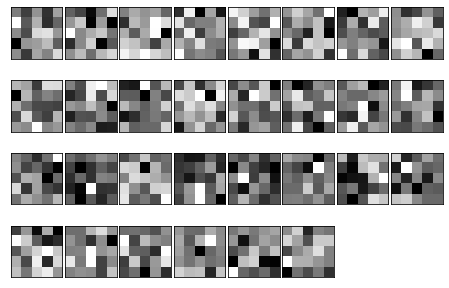

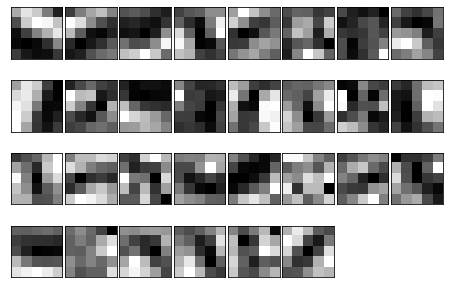

In [20]:
# Conv layer filter 시각화
import numpy as np
import matplotlib.pyplot as plt
from DLS_git_clone.ch07.simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN/nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

network = SimpleConvNet()

# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

>> ![pic/filter_visualization](pic/filter_visualization.png)  
>> 
>> 위 그림과 같이 학습 전 필터는 무작위로 초기화되고 있어 흑백의 정도에 규칙성이 없음  
>> 
>> 한편, 학습을 마친 필터는 규칙성 있는 이미지가 되었음  
>> 
>> 흰색에서 검은색으로 점차 변화하는 필터와 덩어리(blob)가 진 필터 등, 규칙을 띄는 필터로 바뀜  
>> 
>> 그림 7-24의 오른쪽같이 규칙성 있는 필터는 무엇을 보고 있는 것일까?  
>> 
>> 그것은 edge(색상이 바뀐 경계선)와 blob(국소적으로 덩어리진 영역) 등을 보고 있음  
>> &nbsp; &nbsp; &rarr; 왼쪽 절반이 흰색이고 오른쪽 절반이 검은색인 필터는 그림 7-25와 같이 세로 방향의 edge에 반응하는 필터  
>> 
>> ![pic/response_filter](pic/response_filter.png)  
>> 
>> 위 그림은 학습된 필터 2개를 선택하여 입력 이미지에 합성곱 처리를 한 결과로, '필터 1'은 세로 edge에 반응하며 '필터 2'은 가로 edge에 반응하는 것을 알 수 있음  
>> 
>> 이처럼 Conv layer의 필터는 edge나 blob등의 원시적인 정보를 추출할 수 있음  
>> 
>> 이러한 원시적인 정보가 뒷단 layer에 전달된다는 것이 앞에서 구현한 CNN에서 일어나는 일  

>> ##### 층 깊이에 따른 추출 정보 변화
>> 앞의 결과는 1번째 층의 Conv layer를 대상으로 한 것  
>> 
>> 1번째 층의 Conv layer에서는 edge나 blob등의 저수준 정보가 추출된다 치고, 그럼 겹겹이 쌓인 CNN의 각 layer에서는 어떤 정보가 추출될까?  
>> 
>> 딥러닝 시각화에 관한 연구에 따르면, layer가 깊어질수록 추출되는 정보 (정확히는 강하게 반응하는 뉴런)는 더 추상화된다는 것을 알 수 있음  
>> 
>> 그림 7-26은 일반 사물 인식(자동차나 개 등)을 수행한 8층의 CNN  
>> 
>> 이 네트워크 구조는 AlexNet이라 하는데, Conv layer와 Pooling layer를 여러겹 쌓고, 마지막으로 fully-connected layer를 거쳐 결과를 출력하는 구조  
>> 
>> 그림 7-26에서 블록으로 나타낸 것은 중간 데이터이며, 그 중간 데이터에 Conv 연산을 연속해서 적용함  
>> 
>> ![pic/alexnet_8layer](pic/alexnet_8layer.png)  
>> 
>> 딥러닝의 흥미로운 점은 위 그림과 같이 Conv layer를 여러겹 쌓으면, 층이 깊어지면서 더 복잡하고 추상화된 정보가 추출된다는 것  
>> 
>> 처음 층은 단순한 edge에 반응하고, 이어서 texture에 반응하고, 더 복잡한 사물의 일부에 반응하도록 변화함  
>> 
>> 즉, layer가 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 '고급'정보로 변화해 감  
>> &nbsp; &nbsp; &rarr; 사물의 '의미'를 이해하도록 변화하는 것  

> ### **7.7** 대표적인 CNN
> 지금까지 제안된 CNN 네트워크의 구성은 다양함  
> 
> 그중에서도 특히 중요한 네트워크 2개를 소개  
> * LeNet (CNN의 원조)  
> * AlexNet (딥러닝이 주목받도록 이끈 네트워크)  
>> 
>> ##### LeNet  
>> LeNet은 손글씨 숫자를 인식하는 네트워크로 1998년에 제안됨  
>> 
>> 그림 7-27과 같이 Conv layer와 pooling layer(정확히는 단순히 '원소를 줄이기'만 하는 subsampling layer)을 반복하고, 마지막으로 fully-connected layer를 거치면서 결과를 출력  
>> 
>> ![pic/lenet_structure](pic/lenet_structure.png)  
>> 
>> LeNet과 '현재의 CNN'을 비교하면 여러 부분에서 차이가 있음  
>> * activation function 
>> &nbsp; &nbsp; &nbsp; LeNet은 sigmoid function을 사용하는 데 반해, 현재는 주로 ReLU를 사용함  
>> * LeNet은 subsampling을 하여 중간 데이터의 크기를 줄이지만, 현재는 max pooling이 주류  
>> 
>> 이처럼 LeNet과 현재의 CNN은 얼마간 차이가 있지만 큰 차이는 아님  
>> 
>> ##### AlexNet
>> 2012년에 발표된 AlexNet은 딥러닝 열풍을 일으키는 데 큰 역할을 함  
>> 
>> 그림 7-28에서 보듯 그 구성은 기본적으로 LeNet과 크게 다르지 않음  
>> 
>> ![pic/alexnet_structure](pic/alexnet_structure.png)  
>> 
>> AlexNet은 Conv layer와 Pooling layer를 거듭하여 마지막으로 fully-connected layer를 거쳐 결과를 출력함  
>> 
>> LeNet에서 큰 구조는 바뀌지 않았지만, AlexNet에서는 다음과 같은 변화가 있음  
>> * activation function으로 ReLU를 이용  
>> * LRN(Local Response Normalization)이라는 국소적 정규화를 실시하는 계층을 이용  
>> * dropout을 사용  
>> 
>> 이상에서 보듯 네트워크 구성 면에서는 LeNet과 AlexNet에 큰 차이는 없음  
>> 
>> 빅데이터와 GPU, 이것이 딥러닝 발전의 큰 원동력  
>> 
>> 딥러닝(심층 신경망)에는 대부분 수많은 매개변수가 쓰임  
>> 
>> 그래서 학습하려면 엄청난 양의 계산을 해야 함  
>> 
>> 또한 그 매개변수를 fitting(적합)시키는 데이터도 대량으로 필요함  
>> 
>> 빅데이터와 GPU가 이런 문제에 해결책을 제시했다고 할 수 있음  